In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append('./preprocessors/')
from feature_format import featureFormat, targetFeatureSplit

In [42]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2", centers=[]):
    "Plotting code to visualize cluster"
    
    # plot each cluster with different color,
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color=colors[pred[ii]])
        
    for ii, pp in centers:
        plt.scatter(ii, pp, color="r", marker="x")
        
    # if you like, place red stars over point that are POIs
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
                
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.show()

In [48]:
# load in the dict of dicts containing all the data on each person
data_dict = pickle.load(open("./final_project/final_project_dataset.pkl", "r"))
# removing existing outlier
data_dict.pop("TOTAL", 0)

feature1 = "salary"
feature2 = "exercised_stock_options"
feature3 = "total_payments"
poi = "poi"
features_list = [poi, feature1, feature2]
feature_list2 = [poi, feature1, feature3]
data = featureFormat(data_dict, features_list)
data2 = featureFormat(data_dict, feature_list2)
poi, finance_features = targetFeatureSplit(data)
poi2, finance_features2 = targetFeatureSplit(data2)
print "POI: ", poi[:5]
print "Finance_features: ", finance_features[:5]

POI:  [0.0, 0.0, 0.0, 0.0, 1.0]
Finance_features:  [array([ 365788.,       0.]), array([  267102.,  6680544.]), array([  170941.,  4890344.]), array([      0.,  651850.]), array([  243293.,  5538001.])]


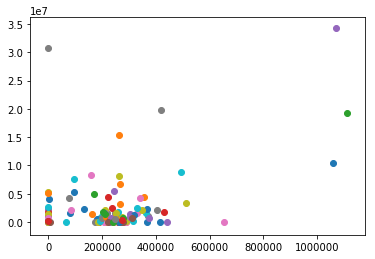

In [6]:
for f1, f2 in finance_features:
    plt.scatter(f1, f2)

plt.show()

## Clustering

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0]
[[   200320.46218487   1507501.63865546]
 [   573218.8         23904558.        ]]


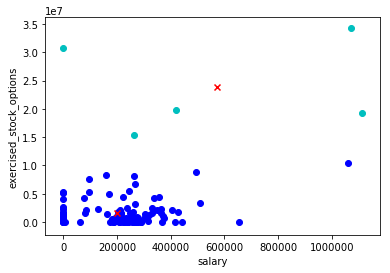

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit_predict(finance_features)
print kmeans.labels_
print kmeans.cluster_centers_
Draw(kmeans.labels_, finance_features, poi, mark_poi=False, f1_name=feature1, f2_name=feature2, centers=kmeans.cluster_centers_)

### Increasing number of clusters

[1 4 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 0
 1 1 1 2 1 1 0 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 4 0 1 1 1 1 1 1 4 3 1 4 4
 2 1 1 1 1 1 1 1 0 1 0 1 1]
[[   189806.93333333   4090557.66666667]
 [   190332.56122449    694683.76530612]
 [   597924.33333333  18136114.        ]
 [   536160.5         32557224.        ]
 [   389740.           8325886.83333333]]


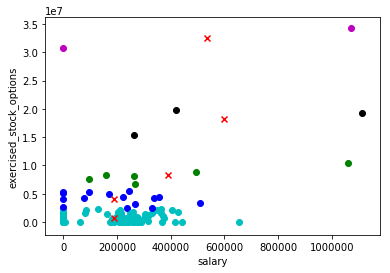

In [46]:
k2 = KMeans(n_clusters=5, random_state=0)
k2.fit_predict(finance_features)
print k2.labels_
print k2.cluster_centers_
Draw(k2.labels_, finance_features, poi, mark_poi=False, f1_name=feature1, f2_name=feature2, centers=k2.cluster_centers_)

### Using total payments as feature 2

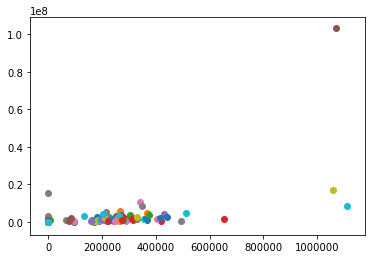

In [49]:
for f1, f2 in finance_features2:
    plt.scatter(f1, f2)

plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[  2.08389496e+05   1.80280027e+06]
 [  1.07232100e+06   1.03559793e+08]]


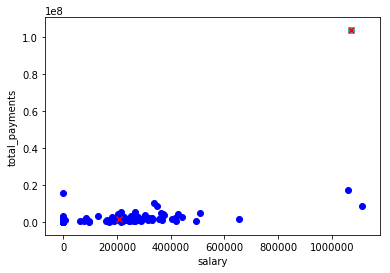

In [50]:
kmeans.fit_predict(finance_features2)
print kmeans.labels_
print kmeans.cluster_centers_
Draw(kmeans.labels_, finance_features2, poi, mark_poi=False, f1_name=feature1, f2_name=feature3, centers=kmeans.cluster_centers_)